**Relembrando o desafio...**

Você foi contratado(a) como cientista de dados pela operadora de telecomunicações **Alura Voz**. Na reunião inicial com as pessoas responsáveis pela área de vendas da empresa, foi explicada a importância de se **reduzir a Taxa de Evasão** de Clientes, conhecido como **Churn Rate**. Basicamente, o Churn Rate indica o quanto a empresa perdeu de receita ou clientes em um período de tempo.

Com sua experiência, você sugere, como passo inicial, a identificação de clientes que teriam uma maior chance de deixar a empresa. Para isso, você explica que é interessante investigar algumas características de clientes ou dos planos de clientes para tentar **CLASSIFICAR** estas pessoas como potenciais candidatas a deixar a empresa ou não.

Assim, você solicita o conjunto de dados para começar a explorar, tratar e modelar a partir de agora. Em seguida, o foco será na otimização de cada um dos modelos com a finalidade de obter o melhor resultado para a tomada de decisão da **Alura Voz**. 

# Importando dados e bibliotecas

In [35]:
import pandas as pd
pd.set_option('display.max_columns', 100)

import seaborn as sns
sns.color_palette("Paired")
import matplotlib as plt
import plotly.express as px
import plotly.graph_objects as go

In [36]:
dados = pd.read_csv('./data_churn_rate_processed.csv')
dados.head()

,id_cliente,churn,genero,idoso,parceiro,dependentes,meses_contrato,servico_telefone,multiplas_linhas,servico_internet,seguranca_online,backup_online,protecao_dispositivo,suporte,streaming_tv,streaming_filmes,contrato,fatura_online,forma_pagamento,cobranca_diaria,cobranca_mensal,cobranca_total
0,0002-ORFBO,No,Female,No,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,2.19,65.6,593.30
1,0003-MKNFE,No,Male,No,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,2.00,59.9,542.40
2,0004-TLHLJ,Yes,Male,No,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.46,73.9,280.85
3,0011-IGKFF,Yes,Male,Yes,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.27,98.0,1237.85
4,0013-EXCHZ,Yes,Female,Yes,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.80,83.9,267.40


# Análise exploratória dos dados

Inicialmente vamos explorar o nosso conjunto de dados tentando encontrar correlações entre nosso atributo classe (`churn`) e o restante das variáveis.

Além disso, também pode ser interessante analisar como as outras variáveis específicas se relacionam entre si.

## Frequência da variável churn

No           71.198569
Yes          25.719004
undefined     3.082427
Name: churn, dtype: float64


Text(0.5, 0, 'Churn')

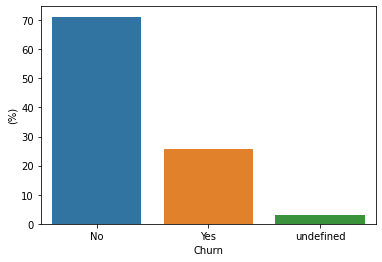

In [37]:
frequencia_churn = dados.churn.value_counts(normalize=True)*100
print(frequencia_churn)

fig = sns.barplot(x=frequencia_churn.index, y=frequencia_churn.values)
fig.set_ylabel('(%)')
fig.set_xlabel('Churn')

Podemos verificar numericamente e visualmente que a grande maioria dos clientes (71%) não geraram **churn**, enquanto que aproximadamente 26% optaram pelo encerramento dos serviços.

Ainda assim pode-se considerar uma taxa de churn bastante alta, por isso nossa análise será importante para identificar as possíveis causas. Outros 3% estão com situação indefinida na variável `churn`

Agora vamos realizar uma série de análises entre `churn` e as outras variáveis do dataset, começando pelo **gênero** dos clientes

## Relação entre `churn` e dados pessoais categóricos (`genero`,`idoso`, `parceiro` e `dependentes`)

### Variável `churn` vs. `genero` e `idoso`

Primeiro vamos ver numericamente como está a distribuição das variáveis e sua relação com nosso atributo principal

In [38]:
from plotly.subplots import make_subplots

print('Variável "gênero"')
frequencia_genero = dados.genero.value_counts()
display(frequencia_genero)

cross_churn_genero = pd.crosstab(dados.churn, dados.genero, normalize='columns').reset_index()
# Cálculo da frequencia de churn por gênero em porcentagem
cross_churn_genero[['Female','Male']] = round(cross_churn_genero[['Female','Male']]*100,2)
print('Porcentagens')
display(cross_churn_genero)
print('\n')

print('Variável "idoso"')
frequencia_idoso = dados.idoso.value_counts()
frequencia_idoso.rename(index={'No':'Nao_idoso','Yes':'Idoso'}, inplace=True)
display(frequencia_idoso)

cross_churn_idoso = pd.crosstab(dados.churn, dados.idoso, normalize='columns').reset_index()
cross_churn_idoso.rename(columns={'No':'Nao_idoso','Yes':'Idoso'}, inplace=True)

# Cálculo da frequencia de churn por idade do cliente em porcentagem
cross_churn_idoso[['Nao_idoso','Idoso']] = round(cross_churn_idoso[['Nao_idoso','Idoso']]*100,2)
print('Porcentagens')
display(cross_churn_idoso)

Variável "gênero"


Male      3675
Female    3592
Name: genero, dtype: int64

Porcentagens


genero,churn,Female,Male
0,No,70.96,71.43
1,Yes,26.14,25.31
2,undefined,2.90,3.27




Variável "idoso"


Nao_idoso    6085
Idoso        1182
Name: idoso, dtype: int64

Porcentagens


idoso,churn,Nao_idoso,Idoso
0,No,74.08,56.35
1,Yes,22.89,40.27
2,undefined,3.02,3.38


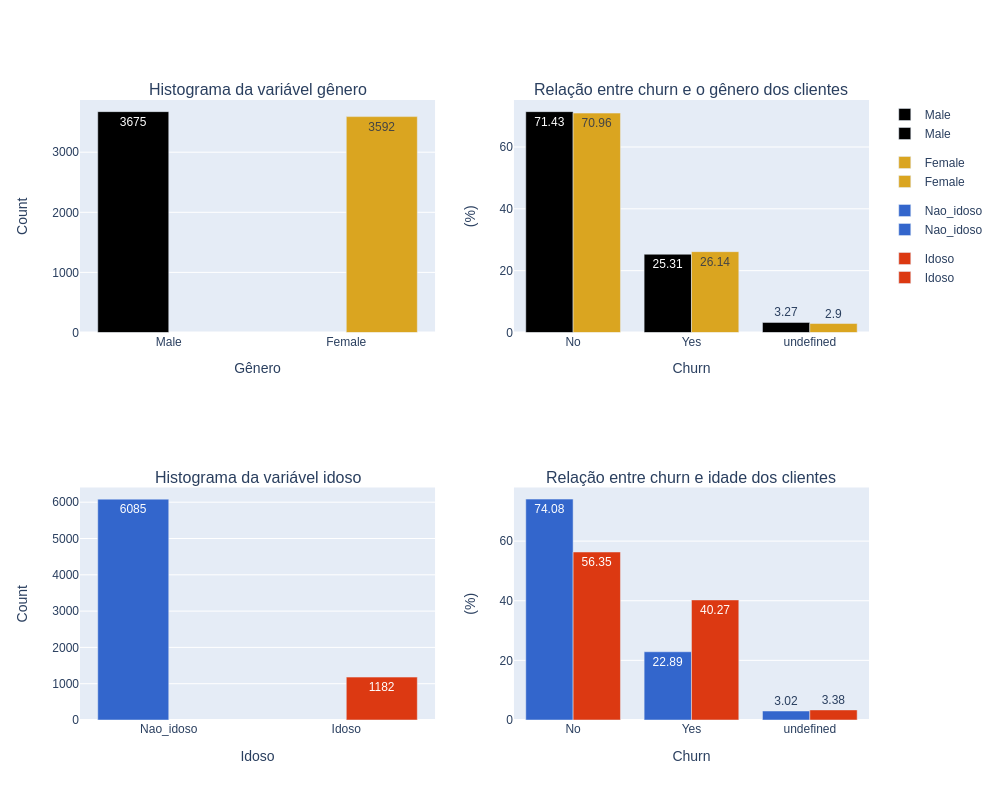

In [39]:
bar1 = px.bar(x=frequencia_genero.index, y=frequencia_genero.values, labels={'x':'gênero','y':'count'}, text_auto=True, color=frequencia_genero.index, color_discrete_sequence=['black','goldenrod'])

bar2 = px.bar(cross_churn_genero, x='churn', y=["Male","Female"], barmode='group', labels={'value':'count'}, text_auto=True, color_discrete_sequence=['black','goldenrod'])

bar3 = px.bar(x=frequencia_idoso.index, y=frequencia_idoso.values, labels={'x':'Idoso','y':'count'}, text_auto=True, color=frequencia_idoso.index, color_discrete_sequence=px.colors.qualitative.G10)

bar4 = px.bar(cross_churn_idoso, x='churn', y=["Nao_idoso","Idoso"], barmode='group', labels={'value':'count'}, text_auto=True, color_discrete_sequence=px.colors.qualitative.G10)

fig = make_subplots(rows=2, cols=2, subplot_titles=['Histograma da variável gênero',"Relação entre churn e o gênero dos clientes",'Histograma da variável idoso',"Relação entre churn e idade dos clientes"])
fig.append_trace(bar1['data'][0], row=1, col=1)
fig.append_trace(bar1['data'][1], row=1, col=1)

fig.append_trace(bar2['data'][0], row=1, col=2)
fig.append_trace(bar2['data'][1], row=1, col=2)

fig.append_trace(bar3['data'][0], row=2, col=1)
fig.append_trace(bar3['data'][1], row=2, col=1)

fig.append_trace(bar4['data'][0], row=2, col=2)
fig.append_trace(bar4['data'][1], row=2, col=2)

fig.update_xaxes(title_text='Gênero', row=1, col=1)
fig.update_xaxes(title_text='Churn', row=1, col=2)
fig.update_xaxes(title_text='Idoso', row=2, col=1)
fig.update_xaxes(title_text='Churn', row=2, col=2)
fig.update_yaxes(title_text='Count', row=1, col=1)
fig.update_yaxes(title_text='(%)', row=1, col=2)
fig.update_yaxes(title_text='Count', row=2, col=1)
fig.update_yaxes(title_text='(%)', row=2, col=2)



fig.update_layout(
    height=800,
    width=1000
)

fig.show('png')

Com estes 4 gráficos, é possível tirar duas conclusões sobre nossos dados.

1º Não há uma relação clara entre a ocorrência de churn e o gênero das pessoas, já que a distribuição da frequência está semelhante nos dois casos. Isso pode indicar que o serviço está adequado para os diferentes perfis de cliente de acordo com o gênero.

2º A **churn rate** está proporcionalmente maior entre os clientes idosos (> 65 anos). Portanto há uma maior dificuldade de reter os clientes de mais idade, uma das causas pode ser a existência de problemas na acessibilidade dos produtos.

Uma análise ainda mais profunda pode ser feito nesse mesmo sentido, verificando o padrão de `churn` com relação às variáveis de gênero e idade **combinadas**

In [40]:
cross_genero_idade = pd.crosstab(dados.churn, [dados.genero,dados.idoso]).unstack().reset_index().rename(columns={0:'Count'})

# Criação de variável de porcentagem de ocorrência de churn, que será calculada separadamente para cada combinação entre as variáveis "genero" e "idoso"
cross_genero_idade = pd.crosstab(dados.churn, [dados.genero,dados.idoso], normalize='columns').unstack().reset_index().rename(columns={0:'percent'})
cross_genero_idade['percent'] = round(cross_genero_idade['percent']*100,2)

cross_genero_idade.idoso.replace({'No':'Nao_idoso','Yes':'Idoso'}, inplace=True)
cross_genero_idade

,genero,idoso,churn,percent
0,Female,Nao_idoso,No,73.98
1,Female,Nao_idoso,Yes,23.28
2,Female,Nao_idoso,undefined,2.73
3,Female,Idoso,No,55.59
4,Female,Idoso,Yes,40.68
5,Female,Idoso,undefined,3.73
6,Male,Nao_idoso,No,74.18
7,Male,Nao_idoso,Yes,22.51
8,Male,Nao_idoso,undefined,3.31
9,Male,Idoso,No,57.09


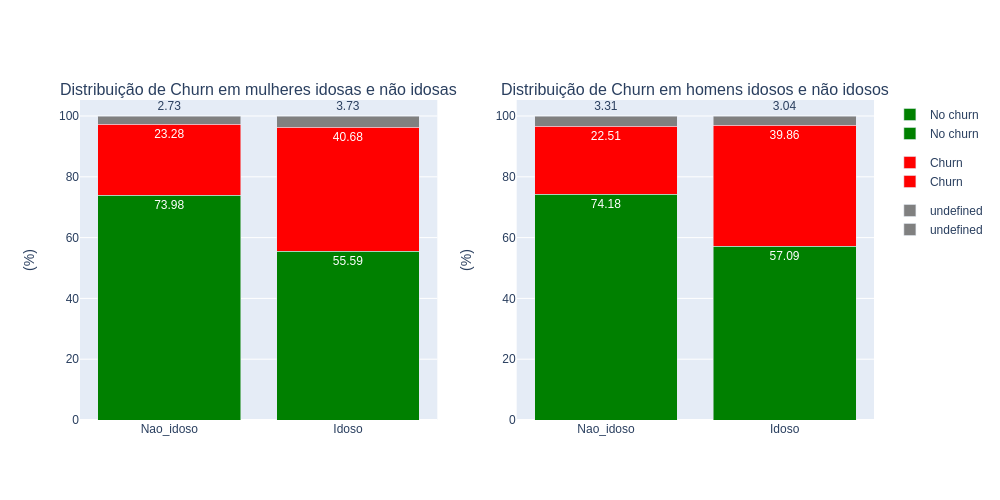

In [41]:
fig = make_subplots(rows=1, cols=2, subplot_titles=['Distribuição de Churn em mulheres idosas e não idosas','Distribuição de Churn em homens idosos e não idosos'])

bar1 = px.bar(x=cross_genero_idade.query('genero=="Female"')['idoso'],y=cross_genero_idade.query('genero=="Female"')['percent'], labels={'x':'Idoso', 'y':'percent'}, text_auto=True, color=cross_genero_idade.query('genero=="Female"')['churn'],
color_discrete_sequence=['green','red','grey'])
bar2 = px.bar(x=cross_genero_idade.query('genero=="Male"')['idoso'],y=cross_genero_idade.query('genero=="Male"')['percent'], labels={'x':'Idoso', 'y':'percent'}, text_auto=True, color=cross_genero_idade.query('genero=="Male"')['churn'],
color_discrete_sequence=['green','red','grey'])

fig.append_trace(bar1['data'][0], row=1, col=1)
fig.append_trace(bar1['data'][1], row=1, col=1)
fig.append_trace(bar1['data'][2], row=1, col=1)


fig.append_trace(bar2['data'][0], row=1, col=2)
fig.append_trace(bar2['data'][1], row=1, col=2)
fig.append_trace(bar2['data'][2], row=1, col=2)

fig.update_yaxes(title_text='(%)', row=1, col=1)
fig.update_yaxes(title_text='(%)', row=1, col=2)


fig.update_layout(width=1000 , height=500, barmode='stack')

newnames = {'No':'No churn', 'Yes': 'Churn', 'undefined': 'undefined'}
fig.for_each_trace(lambda t: t.update(name = newnames[t.name],
                                      legendgroup = newnames[t.name],
                                      hovertemplate = t.hovertemplate.replace(t.name, newnames[t.name])
                                     )
                  )

fig.show('png')

Nesse caso vimos que a **churn rate** está similar entre mulheres e homens idosos;

Portanto agora temos mais confiança em dizer que a idade é um fator importante para ocorrência de churn, indiferente do gênero da pessoa.

### Variável `churn` vs. `parceiro` e `dependentes`

Nesta análise iremos prosseguir de maneira similar, observando como a ocorrência de 'churn' varia de acordo com os valores nas variáveis 'parceiro' e 'dependentes'

,parceiro,churn,percent
0,Sem parceiro,Sem churn,65.11
1,Sem parceiro,Com churn,32.01
2,Sem parceiro,Indefinido,2.88
3,Com parceiro,Sem churn,77.69
4,Com parceiro,Com churn,19.02
5,Com parceiro,Indefinido,3.30


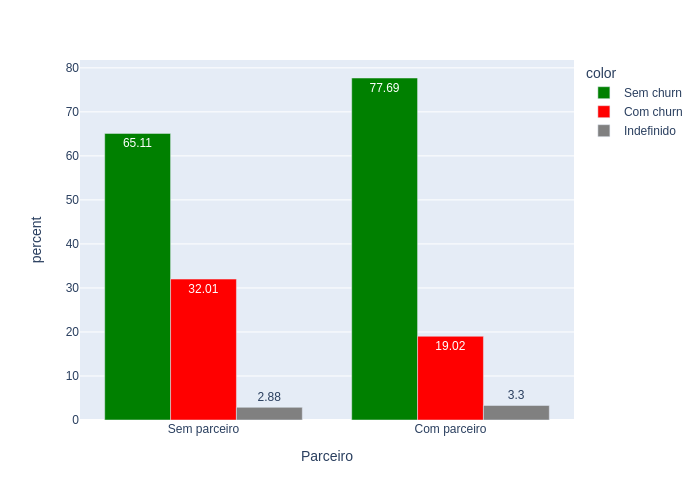

In [42]:
cross_churn_parceiro = pd.crosstab(dados.churn, dados.parceiro, normalize='columns').unstack().reset_index().rename(columns={0:'percent'})
cross_churn_parceiro['percent'] = round(cross_churn_parceiro['percent']*100,2)
cross_churn_parceiro.parceiro.replace({'No':'Sem parceiro', 'Yes':'Com parceiro'}, inplace=True)
cross_churn_parceiro.churn.replace({'No':'Sem churn','Yes':'Com churn','undefined':'Indefinido'}, inplace=True)

display(cross_churn_parceiro)

bar1 = px.bar(x=cross_churn_parceiro.parceiro,y=cross_churn_parceiro.percent, labels={'x':'Parceiro', 'y':'percent'}, text_auto=True, color=cross_churn_parceiro.churn, barmode='group',
color_discrete_sequence=['green','red','grey'])

bar1.show('png')

,dependentes,churn,percent
0,Sem dependentes,Sem churn,66.65
1,Sem dependentes,Com churn,30.34
2,Sem dependentes,Indefinido,3.01
3,Com dependentes,Sem churn,81.80
4,Com dependentes,Com churn,14.95
5,Com dependentes,Indefinido,3.26


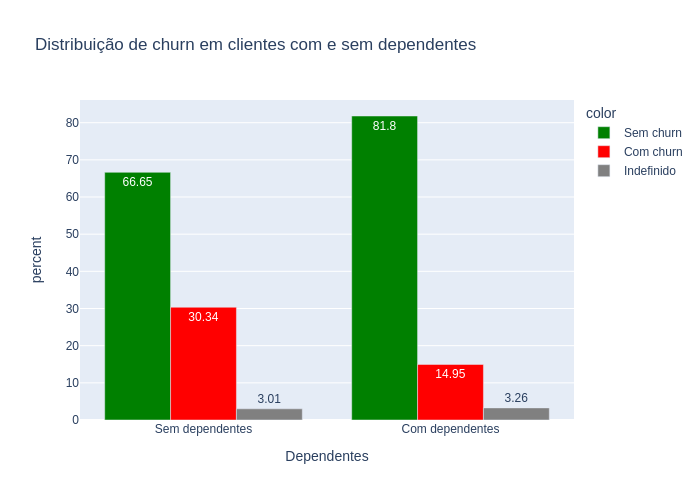

In [58]:
cross_churn_dependentes = pd.crosstab(dados.churn, dados.dependentes, normalize='columns').unstack().reset_index().rename(columns={0:'percent'})
cross_churn_dependentes['percent'] = round(cross_churn_dependentes['percent']*100,2)
cross_churn_dependentes.dependentes.replace({'No':'Sem dependentes', 'Yes':'Com dependentes'}, inplace=True)
cross_churn_dependentes.churn.replace({'No':'Sem churn','Yes':'Com churn','undefined':'Indefinido'}, inplace=True)

display(cross_churn_dependentes)

bar2 = px.bar(x=cross_churn_dependentes.dependentes,y=cross_churn_dependentes.percent, labels={'x':'Dependentes', 'y':'percent'}, text_auto=True, color=cross_churn_dependentes.churn, barmode='group',
color_discrete_sequence=['green','red','grey'], title='Distribuição de churn em clientes com e sem dependentes')

bar2.show('png')

Neste caso, temos algumas constatações de certa forma inesperadas sobre nosso conjunto de dados. 

Em geral, há uma tendência dos consumidores **sem dependentes** e **sem parceiros** optarem pela descontinuidade dos serviços da **Alura Voz** em maior proporção do que os consumidores **com dependentes e parceiros**. Consumidores com dependentes e parceiros indicam mais pessoas consumindo os serviços e, portanto, contratação de planos mais caros, o que poderia ocasionar um maior churn, mas não é isso que nosso dados mostram.

Nossos dados indicam que há uma maior taxa de churn nos clientes sem dependentes e sem parceiros (provavelmente pessoas solteiras). Uma interpretação possível é que pessoas solteiras tendem a ser mais jovens e não possuem grande estabilidade financeira, desta forma pequenas variações nos preços e qualidade dos serviços prestados já são suficientes para aumentar a taxa de churn nesse grupo de pessoas.

## Relação entre `churn` e outras variáveis categóricas
`streaming_tv`, `streaming_filmes`, `contrato` e `fatura_online`)

Nesta seção vamos finalizar a análise da ocorrência de churn com os atributos categóricos restantes, os quais descrevem as características do serviço contratado e também de "infraestrutura" por parte do cliente. 

Assim poderemos identificar se o churn está relacionado à contratação de algum serviço específico prestado pela **Alura Voz**.

### Variável `churn` vs. `servico_telefone`, `multiplas_linhas`, `servico_internet`

Devido à uma certa redundância de informações no nosso *dataset*, podemos descartar a avaliação individual da variável 'servico_telefone', já que na variável 'multiplas_linhas' podemos obter as mesmas informações.

'servico_telefone' / 'multiplas_linhas'

**No** = **No phone service**

**Yes** = [**No**, **Yes**]

In [44]:
print(dados.multiplas_linhas.unique())
print(dados.servico_telefone.unique())

print(dados.servico_telefone.value_counts())

# Distrubição de churn com relação às características de telefonia dos usuários
cross_churn_multiplas_linhas = pd.crosstab(dados.churn, dados.multiplas_linhas, normalize='columns').unstack().reset_index().rename(columns={0:'percent'})
cross_churn_multiplas_linhas.percent = round(cross_churn_multiplas_linhas.percent * 100, 2)
print('Variável "multiplas_linhas"')
display(cross_churn_multiplas_linhas)

['No' 'Yes' 'No phone service']
['Yes' 'No']
Yes    6560
No      707
Name: servico_telefone, dtype: int64
Variável "multiplas_linhas"


,multiplas_linhas,churn,percent
0,No,No,72.70
1,No,Yes,24.29
2,No,undefined,3.00
3,No phone service,No,72.42
4,No phone service,Yes,24.05
5,No phone service,undefined,3.54
6,Yes,No,69.20
7,Yes,Yes,27.73
8,Yes,undefined,3.07


Vimos que o churn está seguindo basicamente a mesma distribuição nas três classes da variável `multiplas_linhas`, portanto é possível afirmar que não há relação entre a ocorrência de `churn` e as variáveis `multiplas_linhas` e `servico_telefone`

Variável "servico_internet"


,servico_internet,churn,percent
0,DSL,No,78.86
1,DSL,Yes,18.45
2,DSL,undefined,2.69
3,Fiber optic,No,56.25
4,Fiber optic,Yes,40.56
5,Fiber optic,undefined,3.19
6,No,No,89.37
7,No,Yes,7.15
8,No,undefined,3.48


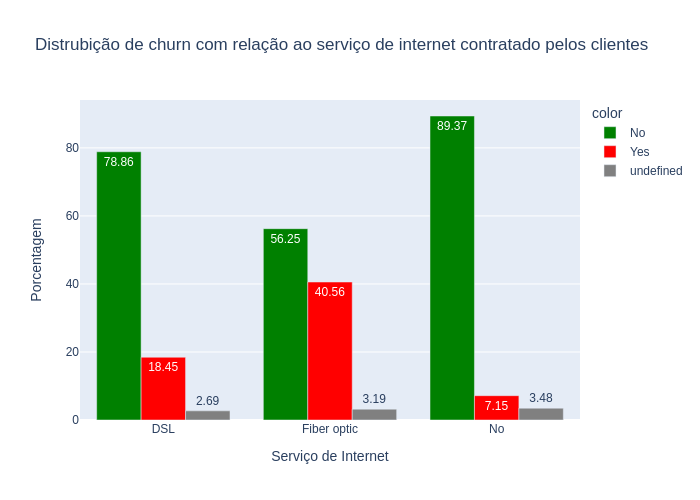

In [45]:
# Distrubição de churn com relação ao serviço de internet contratado pelos clientes
cross_churn_internet = pd.crosstab(dados.churn, dados.servico_internet, normalize='columns').unstack().reset_index().rename(columns={0:'percent'})
cross_churn_internet.percent = round(cross_churn_internet.percent * 100, 2)
print('Variável "servico_internet"')
display(cross_churn_internet)

bar = px.bar(x=cross_churn_internet.servico_internet,y=cross_churn_internet.percent, labels={'x':'Serviço de Internet', 'y':'Porcentagem'}, text_auto=True, color=cross_churn_internet.churn, barmode='group',
color_discrete_sequence=['green','red','grey'], title="Distrubição de churn com relação ao serviço de internet contratado pelos clientes")

bar.show('png')

Já no caso do serviço de internet, fica claro que proporcionalmente ocorre mais churn nos clientes que utilizam **fibra ótica**.

Curiosamente, fibra óptica é considerada uma tecnologia muito superior à DSL. Uma hipótese a ser levantada é que a fibra ótica oferecida pela **Alura Voz** não está agradando os usuários.

Outro ponto interessante é a tendência de ocorrer menos churn entre clientes sem serviço de internet. Isso representa um ponto positivo para o serviços da **Alura Voz**, que pode indicar uma boa qualidade dos serviços apenas de telefonia.

Podemos tentar confirmar as suposições acima com uma nova análise, comparando como a taxa de churn de acordo com as possíveis combinações de serviços de telefonia e internet.

,servico_telefone,servico_internet,churn,percent
0,Sem telefone,DSL,Sem churn,72.42
1,Sem telefone,DSL,Com churn,24.05
2,Sem telefone,DSL,Indefinido,3.54
3,Com telefone,DSL,Sem churn,81.41
4,Com telefone,DSL,Com churn,16.23
5,Com telefone,DSL,Indefinido,2.36
6,Com telefone,Fibra ótica,Sem churn,56.25
7,Com telefone,Fibra ótica,Com churn,40.56
8,Com telefone,Fibra ótica,Indefinido,3.19
9,Com telefone,Sem internet,Sem churn,89.37


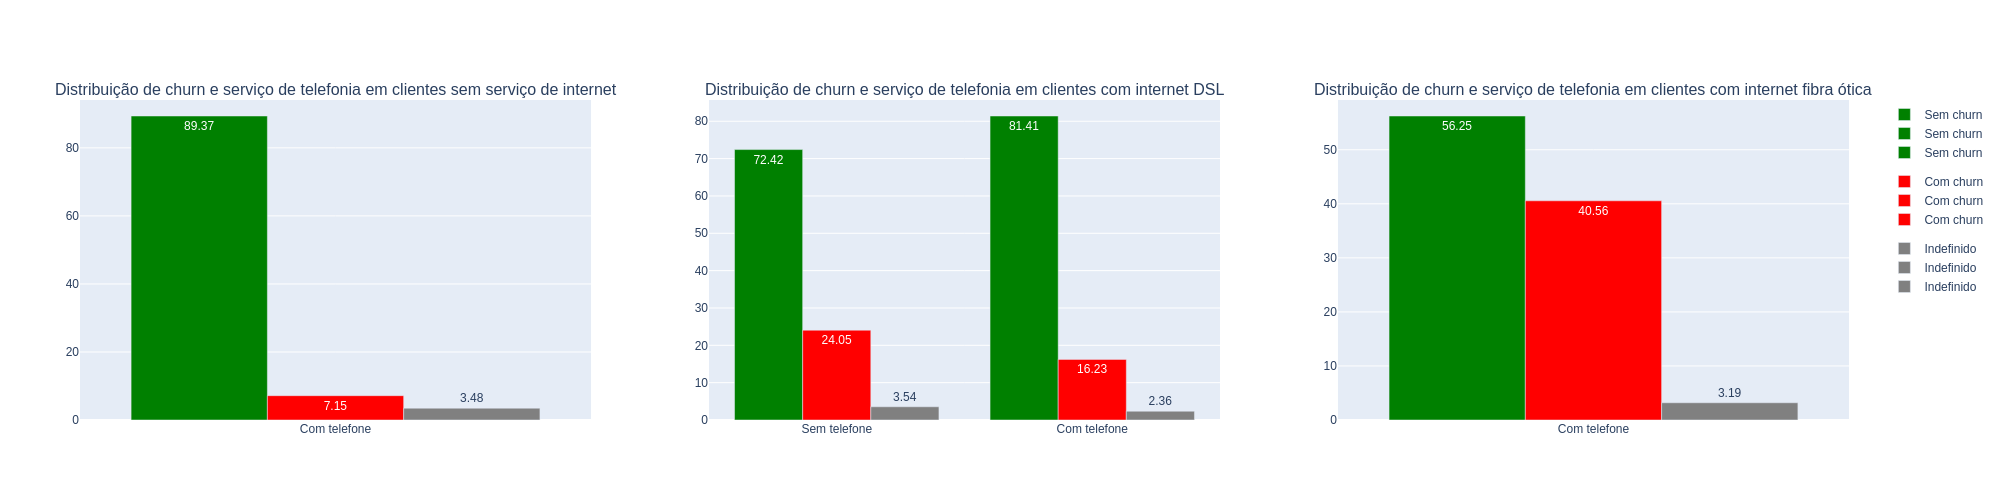

In [55]:
cross_internet_telefonia = pd.crosstab(dados.churn, [dados.servico_telefone,dados.servico_internet], normalize='columns').unstack().reset_index().rename(columns={0:'percent'})
cross_internet_telefonia['percent'] = round(cross_internet_telefonia['percent']*100,2)
cross_internet_telefonia.servico_telefone.replace({'No':'Sem telefone', 'Yes':'Com telefone'}, inplace=True)
cross_internet_telefonia.servico_internet.replace({'No':'Sem internet', 'Fiber optic':'Fibra ótica'}, inplace=True)
cross_internet_telefonia.churn.replace({'No':'Sem churn', 'Yes':'Com churn','undefined':'Indefinido'}, inplace=True)

display(cross_internet_telefonia)

fig = make_subplots(rows=1, cols=3, subplot_titles=['Distribuição de churn e serviço de telefonia em clientes sem serviço de internet',
'Distribuição de churn e serviço de telefonia em clientes com internet DSL','Distribuição de churn e serviço de telefonia em clientes com internet fibra ótica'])

df_fig1 = cross_internet_telefonia.query('servico_internet=="Sem internet"')
df_fig2 = cross_internet_telefonia.query('servico_internet=="DSL"')
df_fig3 = cross_internet_telefonia.query('servico_internet=="Fibra ótica"')

fig1 = px.bar(x=df_fig1['servico_telefone'],y=df_fig1['percent'],text_auto=True, color=df_fig1['churn'], color_discrete_sequence=['green','red','grey'])
fig2 = px.bar(x=df_fig2['servico_telefone'],y=df_fig2['percent'],text_auto=True, color=df_fig2['churn'], color_discrete_sequence=['green','red','grey'])
fig3 = px.bar(x=df_fig3['servico_telefone'],y=df_fig3['percent'],text_auto=True, color=df_fig3['churn'], color_discrete_sequence=['green','red','grey'])


for i in range(len(fig1.data)):
    fig.append_trace(fig1['data'][i], row=1, col=1)
    fig.append_trace(fig2['data'][i], row=1, col=2)
    fig.append_trace(fig3['data'][i], row=1, col=3)

fig.update_layout({'width':2000})
fig.show('png')

De certa forma, o segundo gráfico acima ajuda a sustentar a hipótese de que o serviço de telefonia é de boa qualidade, pois nos clientes que possuem internet DSL houve menor taxa de churn nos clientes que também haviam contratado serviços de telefonia.

Infelizmente essa comparação não pôde ser feita nos clientes sem internet ou com internet fibra ótica, o que incrementaria ainda mais nossa análise.

Por outro lado, o terceiro gráfico também deixa claro que, mesmo contratando serviços de telefonia, os clientes usuários de fibra ótica parecem descontentes com a qualidade do serviço.

### Variável `churn` vs. `seguranca_online`, `protecao_dispositivo`, `suporte`, `backup_online`, `fatura_online`

Agora vamos trabalhar com outras três variáveis que de certa forma estão relacionadas, pois indicam preferências de segurança e suporte por parte do usuário

No                     3608
Yes                    2078
No internet service    1581
Name: seguranca_online, dtype: int64
Variável "seguranca_online"


,seguranca_online,churn,percent
0,Não utiliza,Sem churn,56.46
1,Não utiliza,Com churn,40.49
2,Não utiliza,Indefinido,3.05
3,Sem internet,Sem churn,89.37
4,Sem internet,Com churn,7.15
5,Sem internet,Indefinido,3.48
6,Utiliza,Sem churn,82.96
7,Utiliza,Com churn,14.20
8,Utiliza,Indefinido,2.84


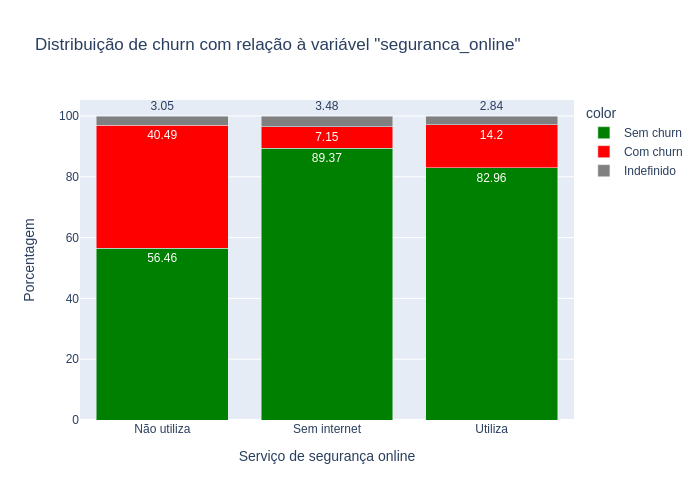

In [47]:
# Distrubição de churn com relação aos serviços de segurança online contratados pelos usuários
print(dados.seguranca_online.value_counts())

cross_churn_seguranca_online = pd.crosstab(dados.churn, dados.seguranca_online, normalize='columns').unstack().reset_index().rename(columns={0:'percent'})
cross_churn_seguranca_online.percent = round(cross_churn_seguranca_online.percent * 100, 2)

cross_churn_seguranca_online.seguranca_online.replace({'No':'Não utiliza', 'No internet service':'Sem internet','Yes':'Utiliza'}, inplace=True)
cross_churn_seguranca_online.churn.replace({'No':'Sem churn', 'Yes':'Com churn','undefined':'Indefinido'}, inplace=True)

print('Variável "seguranca_online"')
display(cross_churn_seguranca_online)

bar = px.bar(x=cross_churn_seguranca_online.seguranca_online,y=cross_churn_seguranca_online.percent, labels={'x':'Serviço de segurança online', 'y':'Porcentagem'}, text_auto=True, color=cross_churn_seguranca_online.churn, barmode='stack',
color_discrete_sequence=['green','red','grey'], title='Distribuição de churn com relação à variável "seguranca_online"')

bar.show('png')

Portanto clientes que não contrataram o serviço de segurança online apresentaram proporcionalmente uma maior taxa de **churn**

No                     3195
Yes                    2491
No internet service    1581
Name: protecao_dispositivo, dtype: int64
Variável "protecao_dispositivo"


,protecao_dispositivo,churn,percent
0,Não utiliza,Sem churn,58.97
1,Não utiliza,Com churn,37.90
2,Não utiliza,Indefinido,3.13
3,Sem internet,Sem churn,89.37
4,Sem internet,Com churn,7.15
5,Sem internet,Indefinido,3.48
6,Utiliza,Sem churn,75.35
7,Utiliza,Com churn,21.88
8,Utiliza,Indefinido,2.77


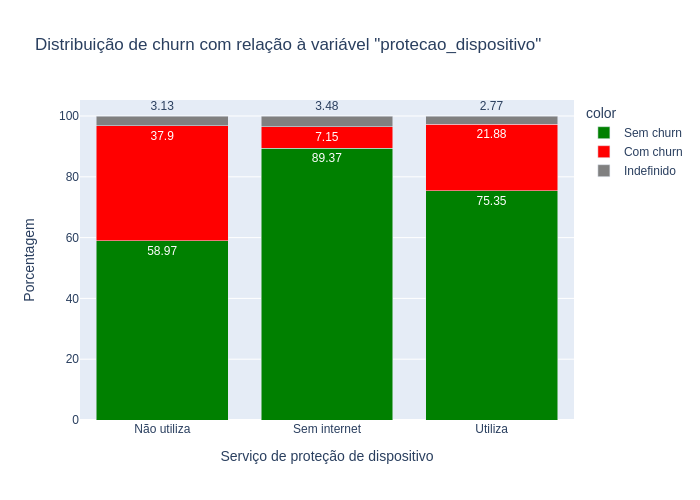

In [48]:
# Distrubição de churn com relação aos serviços de proteção de dispositivo contratados pelos usuários
print(dados.protecao_dispositivo.value_counts())

cross_churn_protecao_dispositivo = pd.crosstab(dados.churn, dados.protecao_dispositivo, normalize='columns').unstack().reset_index().rename(columns={0:'percent'})
cross_churn_protecao_dispositivo.percent = round(cross_churn_protecao_dispositivo.percent * 100, 2)

cross_churn_protecao_dispositivo.protecao_dispositivo.replace({'No':'Não utiliza', 'No internet service':'Sem internet','Yes':'Utiliza'}, inplace=True)
cross_churn_protecao_dispositivo.churn.replace({'No':'Sem churn', 'Yes':'Com churn','undefined':'Indefinido'}, inplace=True)

print('Variável "protecao_dispositivo"')
display(cross_churn_protecao_dispositivo)

bar = px.bar(x=cross_churn_protecao_dispositivo.protecao_dispositivo,y=cross_churn_protecao_dispositivo.percent, labels={'x':'Serviço de proteção de dispositivo', 'y':'Porcentagem'}, text_auto=True, color=cross_churn_protecao_dispositivo.churn, barmode='stack',
color_discrete_sequence=['green','red','grey'], title='Distribuição de churn com relação à variável "protecao_dispositivo"')

bar.show('png')

Novamente os dados indicam que usuários que contratam os serviços adicionais de segurança estão mais satisfeitos com os serviços, ocorrendo menos churn proporcionalmente.

In [49]:
# Distrubição de churn com relação aos serviços de suporte
print('Variável "suporte"')
print(dados.suporte.value_counts())

cross_churn_suporte = pd.crosstab(dados.churn, dados.suporte, normalize='columns').unstack().reset_index().rename(columns={0:'percent'})
cross_churn_suporte.percent = round(cross_churn_suporte.percent * 100, 2)

cross_churn_suporte.suporte.replace({'No':'Não utiliza', 'No internet service':'Sem internet','Yes':'Utiliza'}, inplace=True)
cross_churn_suporte.churn.replace({'No':'Sem churn', 'Yes':'Com churn','undefined':'Indefinido'}, inplace=True)

display(cross_churn_suporte)
print('\n')

# Distrubição de churn com relação aos serviços de backup online
print('Variável "backup_online"')

print(dados.backup_online.value_counts())

cross_churn_backup_online = pd.crosstab(dados.churn, dados.backup_online, normalize='columns').unstack().reset_index().rename(columns={0:'percent'})
cross_churn_backup_online.percent = round(cross_churn_backup_online.percent * 100, 2)

cross_churn_backup_online.backup_online.replace({'No':'Não utiliza', 'No internet service':'Sem internet','Yes':'Utiliza'}, inplace=True)
cross_churn_backup_online.churn.replace({'No':'Sem churn', 'Yes':'Com churn','undefined':'Indefinido'}, inplace=True)

print('Variável "backup_online"')
display(cross_churn_backup_online)

Variável "suporte"
No                     3582
Yes                    2104
No internet service    1581
Name: suporte, dtype: int64


,suporte,churn,percent
0,Não utiliza,Sem churn,56.59
1,Não utiliza,Com churn,40.37
2,Não utiliza,Indefinido,3.04
3,Sem internet,Sem churn,89.37
4,Sem internet,Com churn,7.15
5,Sem internet,Indefinido,3.48
6,Utiliza,Sem churn,82.41
7,Utiliza,Com churn,14.73
8,Utiliza,Indefinido,2.85




Variável "backup_online"
No                     3182
Yes                    2504
No internet service    1581
Name: backup_online, dtype: int64
Variável "backup_online"


,backup_online,churn,percent
0,Não utiliza,Sem churn,58.30
1,Não utiliza,Com churn,38.75
2,Não utiliza,Indefinido,2.95
3,Sem internet,Sem churn,89.37
4,Sem internet,Com churn,7.15
5,Sem internet,Indefinido,3.48
6,Utiliza,Sem churn,76.12
7,Utiliza,Com churn,20.89
8,Utiliza,Indefinido,3.00


Percebe-se que o mesmo padrão se repete nos serviços adicionais de backup e suporte preferencial. 

Assim, podemos concluir que os serviços adicionais da **Alura Voz** estão agradando os clientes contratantes. Uma boa opção para reduzir o **churn** na empresa seria um maior investimento em estratégias para aumentar a adesão dos serviços adicionais.

In [50]:
# Distrubição de churn com relação à opção por fatura online
print('Variável "fatura_online"')
print(dados.fatura_online.value_counts())

cross_churn_fatura_online = pd.crosstab(dados.churn, dados.fatura_online, normalize='columns').unstack().reset_index().rename(columns={0:'percent'})
cross_churn_fatura_online.percent = round(cross_churn_fatura_online.percent * 100, 2)

cross_churn_fatura_online.fatura_online.replace({'No':'Não utiliza', 'Yes':'Utiliza'}, inplace=True)
cross_churn_fatura_online.churn.replace({'No':'Sem churn', 'Yes':'Com churn','undefined':'Indefinido'}, inplace=True)

display(cross_churn_fatura_online)

Variável "fatura_online"
Yes    4311
No     2956
Name: fatura_online, dtype: int64


,fatura_online,churn,percent
0,Não utiliza,Sem churn,81.29
1,Não utiliza,Com churn,15.87
2,Não utiliza,Indefinido,2.84
3,Utiliza,Sem churn,64.28
4,Utiliza,Com churn,32.48
5,Utiliza,Indefinido,3.25


Já no caso da opção por **fatura online** ocorre o contrário. Clientes que optaram por este diferencial estão com uma taxa de churn proporcionalmente acima da média. 

### Variável `churn` vs. `streaming_tv`, `streaming_filmes`

Vamos analisar agora como a taxa de churn varia entre os usuários que assinaram ou não serviços de streaming da Alura Voz

In [51]:
# Distrubição de churn com relação ao serviço de streaming de TV
print('Variável "streaming_tv"')
print(dados.streaming_tv.value_counts())

cross_churn_streaming_tv = pd.crosstab(dados.churn, dados.streaming_tv, normalize='columns').unstack().reset_index().rename(columns={0:'percent'})
cross_churn_streaming_tv.percent = round(cross_churn_streaming_tv.percent * 100, 2)

cross_churn_streaming_tv.streaming_tv.replace({'No':'Não utiliza', 'Yes':'Utiliza'}, inplace=True)
cross_churn_streaming_tv.churn.replace({'No':'Sem churn', 'Yes':'Com churn','undefined':'Indefinido'}, inplace=True)

display(cross_churn_streaming_tv)

Variável "streaming_tv"
No                     2896
Yes                    2790
No internet service    1581
Name: streaming_tv, dtype: int64


,streaming_tv,churn,percent
0,Não utiliza,Sem churn,64.50
1,Não utiliza,Com churn,32.53
2,Não utiliza,Indefinido,2.97
3,No internet service,Sem churn,89.37
4,No internet service,Com churn,7.15
5,No internet service,Indefinido,3.48
6,Utiliza,Sem churn,67.85
7,Utiliza,Com churn,29.18
8,Utiliza,Indefinido,2.97


In [52]:
# Distrubição de churn com relação ao serviço de streaming de filmes
print('Variável "streaming_filmes"')
print(dados.streaming_filmes.value_counts())

cross_churn_streaming_filmes = pd.crosstab(dados.churn, dados.streaming_filmes, normalize='columns').unstack().reset_index().rename(columns={0:'percent'})
cross_churn_streaming_filmes.percent = round(cross_churn_streaming_filmes.percent * 100, 2)

cross_churn_streaming_filmes.streaming_filmes.replace({'No':'Não utiliza', 'Yes':'Utiliza'}, inplace=True)
cross_churn_streaming_filmes.churn.replace({'No':'Sem churn', 'Yes':'Com churn','undefined':'Indefinido'}, inplace=True)

display(cross_churn_streaming_filmes)

Variável "streaming_filmes"
No                     2870
Yes                    2816
No internet service    1581
Name: streaming_filmes, dtype: int64


,streaming_filmes,churn,percent
0,Não utiliza,Sem churn,64.36
1,Não utiliza,Com churn,32.68
2,Não utiliza,Indefinido,2.96
3,No internet service,Sem churn,89.37
4,No internet service,Com churn,7.15
5,No internet service,Indefinido,3.48
6,Utiliza,Sem churn,67.97
7,Utiliza,Com churn,29.05
8,Utiliza,Indefinido,2.98


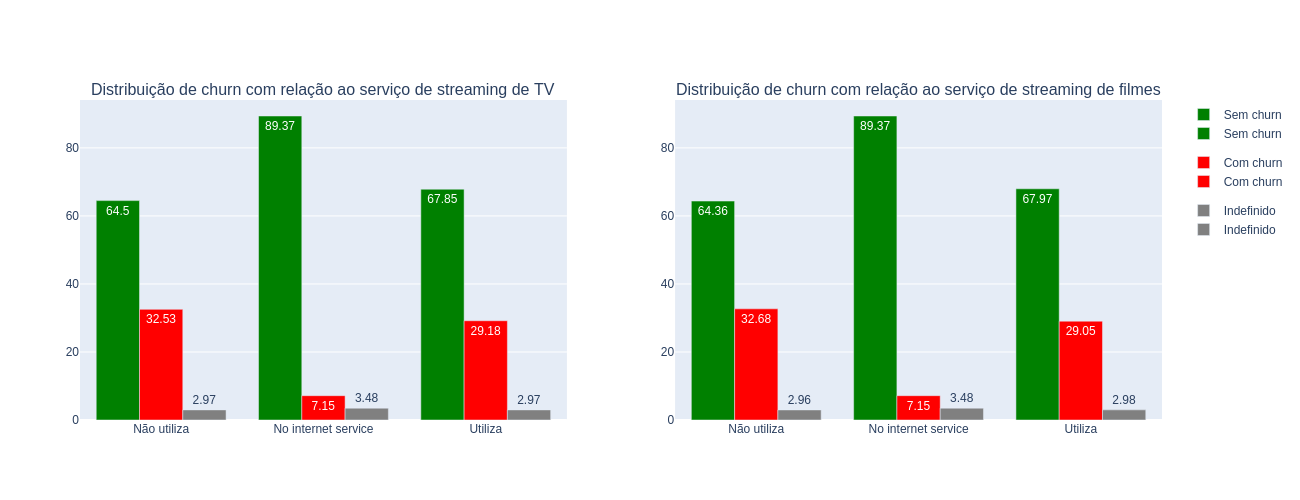

In [57]:
fig = make_subplots(rows=1, cols=2, subplot_titles=['Distribuição de churn com relação ao serviço de streaming de TV','Distribuição de churn com relação ao serviço de streaming de filmes'])

fig1 = px.bar(x=cross_churn_streaming_tv['streaming_tv'],y=cross_churn_streaming_tv['percent'],text_auto=True, color=cross_churn_streaming_tv['churn'], color_discrete_sequence=['green','red','grey'])
fig2 = px.bar(x=cross_churn_streaming_filmes['streaming_filmes'],y=cross_churn_streaming_filmes['percent'],text_auto=True, color=cross_churn_streaming_filmes['churn'], color_discrete_sequence=['green','red','grey'])

for i in range(len(fig1.data)):
    fig.append_trace(fig1['data'][i], row=1, col=1)
    fig.append_trace(fig2['data'][i], row=1, col=2)
fig.update_layout({'width':1300})
fig.show('png')

Com relação aos serviços de streaming da **Alura Voz**, não é perceptível nenhum padrão nos dados, pois a taxa de churn é similar em clientes que assinaram os serviços e aqueles que não assinaram.